# 1D Heat Equation


The one-dimensional heat equation describes the evolution of temperature $u(x, t)$ in a rod of length $L$ over time $t$:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} + S(x, t)
$$
with boundary conditions:
$$
u(0, t) = u_0, \quad u(L, t) = u_1
$$
and initial condition:
$$
u(x, 0) = v(x)
$$
where:
- $ u(x, t) $: Temperature at position $ x $ and time $ t $ (units: $ \mathrm{K} $ or $ \mathrm{^\circ C} $)
- $ \alpha $: Thermal diffusivity (units: $ \mathrm{m}^2/\mathrm{s} $)
- $ x $: Spatial coordinate ($ 0 \leq x \leq L $) (units: $ \mathrm{m} $)
- $ t $: Time (units: $ \mathrm{s} $)
- $ S(x, t) $: Source term (units: $ \mathrm{K/s} $ or $ \mathrm{^\circ C/s} $)


### Task 1: Non-Dimensionalization

To simplify the equation and reduce the number of parameters, introduce dimensionless variables:

- Dimensionless position: $ X = \frac{x}{L} $
- Dimensionless time: $ \tau = \frac{\alpha t}{L^2} $
- Dimensionless temperature: $ U(X, \tau) = \frac{u(x, t) - u_0}{u_1 - u_0} $ (where $u_0$ and $u_1$ are the boundary conditions. For the moment assumed constant).

Show that by substituting this into the original equation we get:

$$
\frac{\partial U}{\partial \tau} = \frac{\partial^2 U}{\partial X^2} + \mathcal{S}(X, \tau)
$$
with boundary conditions:
$$
U(0, \tau) = 0, \quad U(1, \tau) = 1,
$$
and initial condition:
$$
U(X, 0) = \frac{v(X)-u_0}{u_1-u_0},
$$
and the dimensionless source term
$$
\mathcal{S}(X, \tau) = \frac{L^2}{\alpha } S(x, t).
$$


This non-dimensional form is universal and independent of the specific values of $ L $ and $ \alpha $, making analysis and numerical simulation more general.

### Task 2. Discretization. 
Assume that the source term $\mathcal{S}(X, \tau)=0$. Divide the length of the non-dimensional rod, $\overline{L}=1$, into an equidistant grid with $nx$ points and intervals $\Delta X$. In this task, assume initial condition $U(X,0)=\delta(X-1)$.

**a)** *Pen and paper:* Write down the forward difference for the time derivative with a time step of $\Delta \tau$. 

**b)** *Pen and paper:* Write down the discrete form of the second derivative wrt $X$. 

**c)** *Pen and paper:* Find a recursion equation for updating each grid point when stepping in time. Use the notation $U_i^n$ to show the temperature in grid point $i$ at time step $n$. Write this equation at the right place in the cell below. 



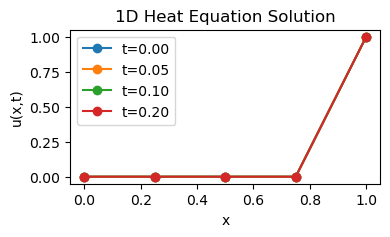

In [47]:
import numpy as np
import matplotlib.pyplot as plt
# This cell numerically solves the 1D heat equation using the explicit Forward Time Centered Space (FTCS) finite difference method.
# It sets up the spatial and temporal grid, applies initial and boundary conditions, and iteratively updates the temperature profile.
# The results are stored and plotted at selected time steps to visualize the evolution of temperature along the rod.

# Parameters
L = 1.0         # Length of the rod
T = 0.2         # Total non-dimensional time to integrate
nx = 5         # Number of spatial points
alpha = 1.0     # Thermal diffusivity, one since we have non-dimensionalized

dx = L / (nx - 1) #The grid spacing in the x direction
dt = 0.0002     # Time step chosen to satisfy stability
nt = int(T / dt)  # Update number of time steps accordingly
x = np.linspace(0, L, nx) # The grid points in the x direction, for visualization.

# Stability criterion for explicit scheme
# For the explicit FTCS method, stability requires: alpha * dt / dx**2 < 0.5
# This ensures that the numerical solution does not grow unbounded and remains physically meaningful.
# If this condition is not met, the simulation may produce incorrect or unstable results.
assert alpha * dt / dx**2 < 0.5, "Stability condition not met!"

# Initial conditions: u(x,0) 
u = np.zeros(nx) # Set all grid points to zero
u[-1] = 1 # Set the last grid point to 1

# Store solution for visualization
u_hist = [u.copy()]

# Time-stepping loop (explicit FTCS, forward time central space)
for n in range(nt):
    u_new = u.copy()
    for i in range(1, nx-1):
        u_new[i] =   0 # insert your recursion equation here.
    u = u_new
    u_hist.append(u.copy())

u_hist = np.array(u_hist)

# Plotting
plt.figure(figsize=(4,2))
for t in [0, int(nt/4), int(nt/2), nt]: # plot four of the time steps.
    plt.plot(x, u_hist[t], marker='o', linestyle='-', label=f't={t*dt:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Heat Equation Solution')
plt.legend()
plt.show()

### Task 3 
Hint: Copy the cell to the empty cell below. Also, remember that if you’re on Colab, you can always refresh the page to go back to the original cell. 

**a)** In the cell above, increase the number of grid points, $nx$, what do you notice? Can you time the time-stepping loop and see how it changes? 

**b)** Set $nx=30$ and increase the time step $dt$ until you get an error from the assertion line. Now comment out that assertion line. What happens? 

**c)** The CFL criteria is beyond the scope of this course, it put restrictions on size of the time step taken. Can you change the code to assure small enough time step to avoid being trapped in the assertion line?

**d)** Change the initial condition to $U(X,0)=\sin(\frac{\pi }{2}X)$ and observe how the solution evolves. How does the choice of initial condition affect the results?

**e)** Use the initial condition from **d**, compute and plot the maximum value of $U$ at each time step. 

**f)** Has the solution reached a steady state? If not, integrate for a longer time period. 

**g)** *Pen and paper:* Can you find a steady state solution for the PDE?

**h)** *Pen and paper:* Can you find a steady state solution for the recurrence relation? 



### Task 4 Neuman boundary conditions at one end.
In previous task we had fixed boundary conditions, these are called Dirichlet boundary conditions.  Another boundary condition could be that gradient is zero at the boundaries, in our case $\frac{\partial U}{\partial X}=0$ at the boundary. 

**a)** Implement a Neuman boundary condition at the left end of the rod. What do you see? What will be the end solution if you integrate long enough?

**b)** Use $nx=5$ and $nx=50$ and read of the value at the left end of the rod, $X=0$. What do you see? Can you explain it?